# Intro to Pandas

Importing pandas and giving it the alias `pd` will give you access to all of its functions by typing `pd.pandas_functions`. You will also have access to special pandas objects: Series and DataFrames.

In [ ]:
import pandas as pd

## 1.&nbsp; Creating DataFrames

We will start by creating some tables of data, called "DataFrames" within the Pandas library. 

If we want a DataFrame with 5 rows and 2 columns, we can do it from a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), a [list](https://www.w3schools.com/python/python_lists.asp) of lists, a list of dictionaries, etc.

We are going to create a 5 row, 2 column DataFrame from a dictionary. To do this, we will follow these steps:

1. Create a dictionary where the keys will be the names of the columns and the values will be lists, with as many elements as the number of rows we want.
2. Convert that dictionary to dataframe with pandas' [pd.DataFrame()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) function.

In [ ]:
# 1. Create the dictionary
data = {
    "x":[1, 2, 3, 4, 5], 
    "y":[6, 7, 8, 9, 10]
}

In [ ]:
data['x']

[1, 2, 3, 4, 5]

In [ ]:
# 2. Convert dictionary to dataframe
df = pd.DataFrame(data)
# print(df)
df

,x,y
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


As we said, we have created a dataframe with 5 rows and two columns, called x and y respectively.

**Observation**: As a result of `print()`, we have not only obtained the 5 rows and 2 columns, but there is an additional "column" of 5 numbers ordered vertically from 0 to 4. This column is called the **index** and it is simply the name of each row, which by default is their ordinal position: 0 indicates the first row; the 1, the second; and so on.

Let's create a bigger dataframe so we can have fun exploring it:

In [ ]:
names = ["Erika", "Javi", "Maria", "Ana", "Shekhar", "Muriel", "Saira", "Alex", "Kit", "Dog"]
ages = [22, 50, 23, 29, 44, 30, 25, 71, 35, 2]
nations = ["DE", "ES", "ES", "ES", "IN", "DE", "IN", "UK", "UK", "XX"]
sibilings = [2, 0, 4, 1, 1, 2, 3, 7, 0, 9]
colors = ["Red", "Yellow", "Yellow", "Blue", "Red", "Yellow", "Blue", "Blue", "Red", "Gray"]

people_data = {"name":names,
               "age":ages,
               "country":nations,
               "sibilings":sibilings,
               "favourite_color":colors}

people = pd.DataFrame(people_data)

people

,name,age,country,sibilings,favourite_color
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow
3,Ana,29,ES,1,Blue
4,Shekhar,44,IN,1,Red
5,Muriel,30,DE,2,Yellow
6,Saira,25,IN,3,Blue
7,Alex,71,UK,7,Blue
8,Kit,35,UK,0,Red
9,Dog,2,XX,9,Gray


## 2.&nbsp; Exploring data

The following methods are really handy to quickly explore the data in a dataframe:

- `.info()` list of columns, their data types and whether or not they contain missing data

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             10 non-null     object
 1   age              10 non-null     int64 
 2   country          10 non-null     object
 3   sibilings        10 non-null     int64 
 4   favourite_color  10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


- `.describe()` summarise numerical columns

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

people.describe()

,age,sibilings
count,10.000000,10.000000
mean,33.100000,2.900000
std,18.645524,2.998148
min,2.000000,0.000000
25%,23.500000,1.000000
50%,29.500000,2.000000
75%,41.750000,3.750000
max,71.000000,9.000000


- `.head()` retrieve just the first `n` rows

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

people.head(3)

,name,age,country,sibilings,favourite_color
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow


- `.tail()` retrieve just the last `n` rows

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html

people.tail(3)

,name,age,country,sibilings,favourite_color
7,Alex,71,UK,7,Blue
8,Kit,35,UK,0,Red
9,Dog,2,XX,9,Gray


- `.hist()` generate histograms of numerical columns

In [ ]:
num_row = people.shape[0]
print(people.shape)
print(num_row)

(10, 5)
10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7ec2eae10>,
      dtype=object)

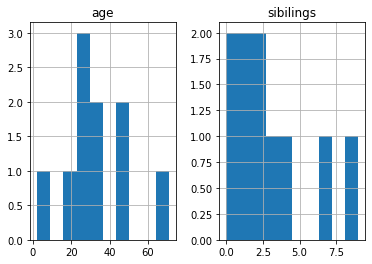

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

people.hist()

In [ ]:
people.sample(5)

,name,age,country,sibilings,favourite_color
5,Muriel,30,DE,2,Yellow
7,Alex,71,UK,7,Blue
3,Ana,29,ES,1,Blue
9,Dog,2,XX,9,Gray
6,Saira,25,IN,3,Blue


In [ ]:
type(people['name'])

pandas.core.series.Series

## 3.&nbsp; Selecting data

### 3.1.&nbsp; Selecting columns

Each column of a dataframe can be retrieved by typing `df_name.column_name`:

In [ ]:
people.name

0      Erika
1       Javi
2      Maria
3        Ana
4    Shekhar
5     Muriel
6      Saira
7       Alex
8        Kit
9        Dog
Name: name, dtype: object

Or with `df_name["column_name"]`:

In [ ]:
people["name"]

0      Erika
1       Javi
2      Maria
3        Ana
4    Shekhar
5     Muriel
6      Saira
7       Alex
8        Kit
9        Dog
Name: name, dtype: object

Using square brackets allows you to pass in a list of column names and select mulitple columns:

In [ ]:
people[["name", "age"]]

,name,age
0,Erika,22
1,Javi,50
2,Maria,23
3,Ana,29
4,Shekhar,44
5,Muriel,30
6,Saira,25
7,Alex,71
8,Kit,35
9,Dog,2


### 3.2. Selecting rows

Check pandas documentation here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Every row has an `index`: by default the index is an integer, starting at `0`. You can use this index in combination with `.loc[]` to select the rows and the columns that you want:

Select row with index=6, and all of the columns

In [ ]:
people

,name,age,country,sibilings,favourite_color
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow
3,Ana,29,ES,1,Blue
4,Shekhar,44,IN,1,Red
5,Muriel,30,DE,2,Yellow
6,Saira,25,IN,3,Blue
7,Alex,71,UK,7,Blue
8,Kit,35,UK,0,Red
9,Dog,2,XX,9,Gray


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

people.loc[6,"name"]

'Saira'

In [ ]:
people.iloc[:,2]

,country
0,DE
1,ES
2,ES
3,ES
4,IN
5,DE
6,IN
7,UK
8,UK
9,XX


Select rows from index=0 to index=2, and all of the columns

In [ ]:
people.loc[:,["country"]]

,country
0,DE
1,ES
2,ES
3,ES
4,IN
5,DE
6,IN
7,UK
8,UK
9,XX


Select rows from index=4 until the last row, and only the "country" column

In [ ]:
people.loc[:4,"country"]

0    DE
1    ES
2    ES
3    ES
4    IN
Name: country, dtype: object

Bear in mind that the index of a dataframe will not necessarily be a number. Let's make the column `name` become the index:

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

people_2 = people.set_index("name")
people_2

,age,country,sibilings,favourite_color
name,,,,
Erika,22,DE,2,Red
Javi,50,ES,0,Yellow
Maria,23,ES,4,Yellow
Ana,29,ES,1,Blue
Shekhar,44,IN,1,Red
Muriel,30,DE,2,Yellow
Saira,25,IN,3,Blue
Alex,71,UK,7,Blue
Kit,35,UK,0,Red


In [ ]:
people_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Erika to Dog
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10 non-null     int64 
 1   country          10 non-null     object
 2   sibilings        10 non-null     int64 
 3   favourite_color  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 700.0+ bytes


Whenever that's the case, the `loc[]` function can be used similarly:

In [ ]:
people_2.loc["Kit":,"sibilings":]

,sibilings,favourite_color
name,,
Kit,0,Red
Dog,9,Gray


No matter what the index is, you can always use `iloc[]` to select rows and columns based on their position in the dataframe:

Select **rows** from position 1 (included) to position 3 (not included), and columns from position 0 (included) to position 2 (not included)

In [ ]:
people_2.iloc[1:3, 0:2]

,age,country
name,,
Javi,50,ES
Maria,23,ES


## 4. Grouping and aggregating

Read the docs here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

Similar to SQL, you can use `.groupby()` to group data, in combination with aggregation functions such as `.mean()`:

In [ ]:
people.groupby("country").mean()

,age,sibilings
country,,
DE,26.0,2.000000
ES,34.0,1.666667
IN,34.5,2.000000
UK,53.0,3.500000
XX,2.0,9.000000


In [ ]:
people.groupby("country").agg({"age":"mean","sibilings":"sum"})

,age,sibilings
country,,
DE,26.0,4
ES,34.0,5
IN,34.5,4
UK,53.0,7
XX,2.0,9


A more simple aggregation is just counting how many rows belong to each category (for categorical columns). This can be done with `value_counts()`:

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

people.country.value_counts()

ES    3
DE    2
IN    2
UK    2
XX    1
Name: country, dtype: int64

## 5. Merging dataframes

Merging dataframes is similar in pandas to SQL.

Read the docs here: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Let's create another dataframe:

In [ ]:
countries = ["Spain", "India", "Italy", "Argentina", "France", "United Kingdom", "Malta", "Germany"]
country_code = ["ES", "IN", "IT", "AR", "FR", "UK", "MA", "DE"]
population = [46, 1380, 61, 43, 63, 65, 2, 82]

country_info = pd.DataFrame({"country":country_code, 
                             "country_name":countries, 
                             "pop":population})
country_info.head()

,country,country_name,pop
0,ES,Spain,46
1,IN,India,1380
2,IT,Italy,61
3,AR,Argentina,43
4,FR,France,63


Merge to dataframes using a "left" join, on the "country" column

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

people.merge(country_info, 
             how="left",
             on="country"
            )

,name,age,country,sibilings,favourite_color,country_name,pop
0,Erika,22,DE,2,Red,Germany,82.0
1,Javi,50,ES,0,Yellow,Spain,46.0
2,Maria,23,ES,4,Yellow,Spain,46.0
3,Ana,29,ES,1,Blue,Spain,46.0
4,Shekhar,44,IN,1,Red,India,1380.0
5,Muriel,30,DE,2,Yellow,Germany,82.0
6,Saira,25,IN,3,Blue,India,1380.0
7,Alex,71,UK,7,Blue,United Kingdom,65.0
8,Kit,35,UK,0,Red,United Kingdom,65.0
9,Dog,2,XX,9,Gray,NaN,NaN


## 6. Import DataFrame from csv

Most of the time, you will not be creating dataframes yourself, but importing (or "reading") data from a csv file or a database into a pandas dataframe. It's easy to do with pandas' read functions
- **When working locally** - you will place either the relative path or absolute path to your data in the `.read_csv()` function
  - `.read_csv("data/csv_to_read.csv")`
- **When working with Colab** - we store the csv online and then use the csvs url to access it. This is the easiest, but there are other options available: take a look at [this notebook](https://colab.research.google.com/notebooks/io.ipynb)

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

url = 'https://drive.google.com/file/d/18zYGrzRhn_mz1HJLXxSO_MwR0_nWBS3K/view?usp=sharing' # vehicles.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
cars = pd.read_csv(path)

In [ ]:
cars.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


## 7.&nbsp; Export DataFrame to csv

You can now convert your dataframes to csv files using `to_csv`
- **When working locally** - If you only give the csv a filename and not a path, it will appear in the same folder as your notebook. However, you can choose where to store your new csv by changing the file path in .to_csv()
  - Example with only filename: `.to_csv("country_info.csv", index=False)`
  - Example with path: `.to_csv("data/output/country_info.csv", index=False)`
- **When working with Colab** - below we show you a very easy option of how to download the csv from Google Colab. However, Google is Google, and there are many ways to connect, such as mounting your Google drive and storing the csv directly into it. If you'd like to explore more options, please check out [this notebook](https://colab.research.google.com/notebooks/io.ipynb)

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html?highlight=to_csv

country_info.to_csv("country_info.csv", index=False)
people.to_csv("people.csv", index=False)

The code below will download these csv files to your local computer:

In [ ]:
from google.colab import files
files.download("country_info.csv")
files.download("people.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>